In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import os

# brew install graphviz
# pip3 install graphviz
# pip3 install pydot-ng
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
timesteps = seq_length = 7
data_dim = 5

In [3]:
# Open,High,Low,Close,Volume
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

In [4]:
# very important. It does not work without it.
scaler = MinMaxScaler(feature_range=(0, 1))
xy = scaler.fit_transform(xy)

In [5]:
x = xy
y = xy[:, [-1]]  # Close as label

In [6]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.3641

 [0.16788274 0.16280027 0.17019473 0.10868513 0.17256536]] -> [0.1507653]
[[0.18478466 0.17944902 0.18008365 0.15495205 0.18588448]
 [0.18213274 0.19343859 0.20094711 0.1308237  0.2027593 ]
 [0.19192429 0.19546199 0.20640511 0.12044456 0.19818349]
 [0.18460988 0.18470955 0.19795402 0.0978937  0.19319974]
 [0.18256988 0.17924665 0.17870437 0.13000807 0.17137043]
 [0.16788274 0.16280027 0.17019473 0.10868513 0.17256536]
 [0.15914044 0.15505392 0.15833981 0.15188671 0.1507653 ]] -> [0.14706388]
[[0.18213274 0.19343859 0.20094711 0.1308237  0.2027593 ]
 [0.19192429 0.19546199 0.20640511 0.12044456 0.19818349]
 [0.18460988 0.18470955 0.19795402 0.0978937  0.19319974]
 [0.18256988 0.17924665 0.17870437 0.13000807 0.17137043]
 [0.16788274 0.16280027 0.17019473 0.10868513 0.17256536]
 [0.15914044 0.15505392 0.15833981 0.15188671 0.1507653 ]
 [0.14439481 0.14262498 0.15191345 0.12876221 0.14706388]] -> [0.17725764]
[[0.19192429 0.19546199 0.20640511 0.12044456 0.19818349]
 [0.18460988 0.1847095

 [0.07095892 0.09669616 0.08051977 0.33168414 0.0931463 ]] -> [0.05426728]
[[0.22301788 0.21826745 0.20980893 0.22558932 0.19914528]
 [0.18379392 0.19988436 0.16576382 0.27552209 0.1513773 ]
 [0.14669698 0.15470702 0.13363217 0.23068029 0.11850205]
 [0.12895002 0.14803021 0.13383762 0.19849422 0.13228744]
 [0.10595755 0.10643691 0.09020323 0.33265215 0.10923414]
 [0.07095892 0.09669616 0.08051977 0.33168414 0.0931463 ]
 [0.09500047 0.10117638 0.06153422 0.49577844 0.05426728]] -> [0.08245015]
[[0.18379392 0.19988436 0.16576382 0.27552209 0.1513773 ]
 [0.14669698 0.15470702 0.13363217 0.23068029 0.11850205]
 [0.12895002 0.14803021 0.13383762 0.19849422 0.13228744]
 [0.10595755 0.10643691 0.09020323 0.33265215 0.10923414]
 [0.07095892 0.09669616 0.08051977 0.33168414 0.0931463 ]
 [0.09500047 0.10117638 0.06153422 0.49577844 0.05426728]
 [0.04312908 0.07452666 0.0602724  0.2330017  0.08245015]] -> [0.09906258]
[[0.14669698 0.15470702 0.13363217 0.23068029 0.11850205]
 [0.12895002 0.148030

 [0.10292681 0.10036705 0.08988032 0.16994712 0.07600928]] -> [0.05085741]
[[0.04764595 0.04776134 0.05415708 0.1993457  0.04182254]
 [0.03671794 0.06735843 0.05469703 0.20263512 0.07428976]
 [0.07818594 0.11664006 0.09431142 0.23922201 0.12194108]
 [0.11930419 0.1335202  0.13333871 0.2038003  0.13814557]
 [0.12787188 0.12435758 0.12356725 0.13765349 0.12433111]
 [0.10292681 0.10036705 0.08988032 0.16994712 0.07600928]
 [0.08197432 0.07808186 0.06584776 0.15021063 0.05085741]] -> [0.05278089]
[[0.03671794 0.06735843 0.05469703 0.20263512 0.07428976]
 [0.07818594 0.11664006 0.09431142 0.23922201 0.12194108]
 [0.11930419 0.1335202  0.13333871 0.2038003  0.13814557]
 [0.12787188 0.12435758 0.12356725 0.13765349 0.12433111]
 [0.10292681 0.10036705 0.08988032 0.16994712 0.07600928]
 [0.08197432 0.07808186 0.06584776 0.15021063 0.05085741]
 [0.04764595 0.04368588 0.04002511 0.37450928 0.05278089]] -> [0.12232013]
[[0.07818594 0.11664006 0.09431142 0.23922201 0.12194108]
 [0.11930419 0.133520

 [0.18341509 0.181877   0.18513074 0.14024379 0.18250377]] -> [0.16259804]
[[0.18866044 0.18736874 0.20125529 0.10659676 0.1907225 ]
 [0.19524628 0.19002792 0.20977966 0.23383526 0.19762982]
 [0.19169118 0.19187778 0.20033093 0.14662544 0.19311234]
 [0.1978982  0.2272277  0.21611785 0.2308237  0.22627905]
 [0.22103639 0.22049305 0.20887002 0.19219324 0.19303956]
 [0.18341509 0.181877   0.18513074 0.14024379 0.18250377]
 [0.1700392  0.17141362 0.17773601 0.16935556 0.16259804]] -> [0.17335234]
[[0.19524628 0.19002792 0.20977966 0.23383526 0.19762982]
 [0.19169118 0.19187778 0.20033093 0.14662544 0.19311234]
 [0.1978982  0.2272277  0.21611785 0.2308237  0.22627905]
 [0.22103639 0.22049305 0.20887002 0.19219324 0.19303956]
 [0.18341509 0.181877   0.18513074 0.14024379 0.18250377]
 [0.1700392  0.17141362 0.17773601 0.16935556 0.16259804]
 [0.16601771 0.16618193 0.17785346 0.11469033 0.17335234]] -> [0.161607]
[[0.19169118 0.19187778 0.20033093 0.14662544 0.19311234]
 [0.1978982  0.2272277 

 [0.1111668  0.12883062 0.12954637 0.13597741 0.1376721 ]] -> [0.1376431]
[[0.11460543 0.12914852 0.13344896 0.17558483 0.13059   ]
 [0.1277481  0.13568087 0.13324944 0.12753428 0.1361567 ]
 [0.12617455 0.13834018 0.14207603 0.13039347 0.1455995 ]
 [0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]
 [0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]
 [0.1111668  0.12883062 0.12954637 0.13597741 0.1376721 ]
 [0.12634939 0.12900403 0.14286837 0.09159272 0.1376431 ]] -> [0.11528913]
[[0.1277481  0.13568087 0.13324944 0.12753428 0.1361567 ]
 [0.12617455 0.13834018 0.14207603 0.13039347 0.1455995 ]
 [0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]
 [0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]
 [0.1111668  0.12883062 0.12954637 0.13597741 0.1376721 ]
 [0.12634939 0.12900403 0.14286837 0.09159272 0.1376431 ]
 [0.12448431 0.12328108 0.1287834  0.23209644 0.11528913]] -> [0.12076831]
[[0.12617455 0.13834018 0.14207603 0.13039347 0.1455995 ]
 [0.13258563 0.1393517

 [0.40266547 0.39555766 0.39833528 0.15410953 0.39475592]] -> [0.40620969]
[[0.4678833  0.51166534 0.48927161 0.30198978 0.49472157]
 [0.48443543 0.52796729 0.50306322 0.35147441 0.49413864]
 [0.48554281 0.48458222 0.45024443 0.27078964 0.44220327]
 [0.44395838 0.43989643 0.39601719 0.32426279 0.38181575]
 [0.36819148 0.39980647 0.39008969 0.23908757 0.39259926]
 [0.40266547 0.39555766 0.39833528 0.15410953 0.39475592]
 [0.39092151 0.39708948 0.39639867 0.14046787 0.40620969]] -> [0.40813333]
[[0.48443543 0.52796729 0.50306322 0.35147441 0.49413864]
 [0.48554281 0.48458222 0.45024443 0.27078964 0.44220327]
 [0.44395838 0.43989643 0.39601719 0.32426279 0.38181575]
 [0.36819148 0.39980647 0.39008969 0.23908757 0.39259926]
 [0.40266547 0.39555766 0.39833528 0.15410953 0.39475592]
 [0.39092151 0.39708948 0.39639867 0.14046787 0.40620969]
 [0.39441848 0.4024656  0.39463794 0.13142422 0.40813333]] -> [0.38779034]
[[0.48554281 0.48458222 0.45024443 0.27078964 0.44220327]
 [0.44395838 0.439896

 [0.30699513 0.31069511 0.31599665 0.18652864 0.31519143]] -> [0.35587706]
[[0.4026363  0.40726378 0.40200325 0.17664247 0.40169233]
 [0.3872497  0.40414209 0.38181472 0.19438917 0.36634002]
 [0.31387239 0.33783609 0.31262205 0.33111051 0.30671028]
 [0.3232851  0.34211402 0.32908404 0.23014251 0.35494459]
 [0.35653503 0.3576355  0.33821278 0.15700457 0.3313666 ]
 [0.30699513 0.31069511 0.31599665 0.18652864 0.31519143]
 [0.34339236 0.34780804 0.34202457 0.20360312 0.35587706]] -> [0.35022302]
[[0.3872497  0.40414209 0.38181472 0.19438917 0.36634002]
 [0.31387239 0.33783609 0.31262205 0.33111051 0.30671028]
 [0.3232851  0.34211402 0.32908404 0.23014251 0.35494459]
 [0.35653503 0.3576355  0.33821278 0.15700457 0.3313666 ]
 [0.30699513 0.31069511 0.31599665 0.18652864 0.31519143]
 [0.34339236 0.34780804 0.34202457 0.20360312 0.35587706]
 [0.3688325  0.37731918 0.3581049  0.15185086 0.35022302]] -> [0.37537475]
[[0.31387239 0.33783609 0.31262205 0.33111051 0.30671028]
 [0.3232851  0.342114

 [0.68428507 0.70381968 0.70984873 0.16614681 0.69567303]] -> [0.70298833]
[[0.62900446 0.64248529 0.65274586 0.12979296 0.65390889]
 [0.64424521 0.64173375 0.65286317 0.17037734 0.63610164]
 [0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]
 [0.65336639 0.66095504 0.66656666 0.13959846 0.66918059]
 [0.66251675 0.68537886 0.68763565 0.15226315 0.68652161]
 [0.68428507 0.70381968 0.70984873 0.16614681 0.69567303]
 [0.69020081 0.6920557  0.70263027 0.13477637 0.70298833]] -> [0.67713716]
[[0.64424521 0.64173375 0.65286317 0.17037734 0.63610164]
 [0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]
 [0.65336639 0.66095504 0.66656666 0.13959846 0.66918059]
 [0.66251675 0.68537886 0.68763565 0.15226315 0.68652161]
 [0.68428507 0.70381968 0.70984873 0.16614681 0.69567303]
 [0.69020081 0.6920557  0.70263027 0.13477637 0.70298833]
 [0.6864125  0.69003255 0.68038764 0.18480774 0.67713716]] -> [0.68713371]
[[0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]
 [0.65336639 0.660955

 [0.74892022 0.74824526 0.756975   0.12167249 0.750319  ]] -> [0.75122247]
[[0.7528542  0.7575814  0.74958032 0.23826297 0.73108369]
 [0.74411187 0.76483636 0.73908988 0.17795106 0.77389699]
 [0.78030509 0.77087721 0.76715721 0.1385229  0.74865774]
 [0.73394165 0.74616425 0.73531928 0.28150937 0.7191635 ]
 [0.73283427 0.73422685 0.74074781 0.13604015 0.74381983]
 [0.74892022 0.74824526 0.756975   0.12167249 0.750319  ]
 [0.75422375 0.74639553 0.75248532 0.13964327 0.75122247]] -> [0.74565594]
[[0.74411187 0.76483636 0.73908988 0.17795106 0.77389699]
 [0.78030509 0.77087721 0.76715721 0.1385229  0.74865774]
 [0.73394165 0.74616425 0.73531928 0.28150937 0.7191635 ]
 [0.73283427 0.73422685 0.74074781 0.13604015 0.74381983]
 [0.74892022 0.74824526 0.756975   0.12167249 0.750319  ]
 [0.75422375 0.74639553 0.75248532 0.13964327 0.75122247]
 [0.74280048 0.73812883 0.76017337 0.04654477 0.74565594]] -> [0.78677881]
[[0.78030509 0.77087721 0.76715721 0.1385229  0.74865774]
 [0.73394165 0.746164

 [0.60263179 0.61398589 0.60453405 0.17938514 0.59250138]] -> [0.60331406]
[[0.57794917 0.58392557 0.57950373 0.22515909 0.57836636]
 [0.59284042 0.61788788 0.59807839 0.22270324 0.62907789]
 [0.62754741 0.62540287 0.61172331 0.16808282 0.59687306]
 [0.58392324 0.59861172 0.60591312 0.14174061 0.6072485 ]
 [0.62011646 0.62797538 0.63073802 0.17405216 0.62342384]
 [0.60263179 0.61398589 0.60453405 0.17938514 0.59250138]
 [0.56611789 0.58970639 0.56697405 0.17528906 0.60331406]] -> [0.62135452]
[[0.59284042 0.61788788 0.59807839 0.22270324 0.62907789]
 [0.62754741 0.62540287 0.61172331 0.16808282 0.59687306]
 [0.58392324 0.59861172 0.60591312 0.14174061 0.6072485 ]
 [0.62011646 0.62797538 0.63073802 0.17405216 0.62342384]
 [0.60263179 0.61398589 0.60453405 0.17938514 0.59250138]
 [0.56611789 0.58970639 0.56697405 0.17528906 0.60331406]
 [0.59843546 0.60699098 0.59574561 0.14648203 0.62135452]] -> [0.61937271]
[[0.62754741 0.62540287 0.61172331 0.16808282 0.59687306]
 [0.58392324 0.598611

 [0.74440321 0.75700328 0.76639424 0.15904813 0.75186374]] -> [0.73560105]
[[0.70756897 0.7197748  0.73329456 0.11309492 0.72336032]
 [0.72184801 0.72185581 0.72945053 0.1276508  0.71552044]
 [0.69168703 0.69881069 0.71433841 0.14224254 0.70747652]
 [0.70561639 0.70240341 0.71873998 0.11592722 0.70231806]
 [0.69920549 0.72627822 0.70776544 0.16992919 0.73507647]
 [0.74440321 0.75700328 0.76639424 0.15904813 0.75186374]
 [0.74192629 0.73668362 0.74350613 0.15334767 0.73560105]] -> [0.75005662]
[[0.72184801 0.72185581 0.72945053 0.1276508  0.71552044]
 [0.69168703 0.69881069 0.71433841 0.14224254 0.70747652]
 [0.70561639 0.70240341 0.71873998 0.11592722 0.70231806]
 [0.69920549 0.72627822 0.70776544 0.16992919 0.73507647]
 [0.74440321 0.75700328 0.76639424 0.15904813 0.75186374]
 [0.74192629 0.73668362 0.74350613 0.15334767 0.73560105]
 [0.71089093 0.73520966 0.73194468 0.14061128 0.75005662]] -> [0.73659187]
[[0.69168703 0.69881069 0.71433841 0.14224254 0.70747652]
 [0.70561639 0.702403

 [0.60312714 0.6318486  0.62489864 0.1631711  0.63298315]] -> [0.61695367]
[[0.63317162 0.63786635 0.65054507 0.11711033 0.63615998]
 [0.62501214 0.64312109 0.63995201 0.11734337 0.6526557 ]
 [0.64500291 0.65190805 0.63543295 0.17865914 0.6227534 ]
 [0.60910103 0.62323506 0.62522138 0.15764991 0.62391925]
 [0.60528355 0.60704884 0.61398266 0.14899166 0.60552907]
 [0.60312714 0.6318486  0.62489864 0.1631711  0.63298315]
 [0.61743552 0.62288258 0.63563838 0.11856234 0.61695367]] -> [0.66314783]
[[0.62501214 0.64312109 0.63995201 0.11734337 0.6526557 ]
 [0.64500291 0.65190805 0.63543295 0.17865914 0.6227534 ]
 [0.60910103 0.62323506 0.62522138 0.15764991 0.62391925]
 [0.60528355 0.60704884 0.61398266 0.14899166 0.60552907]
 [0.60312714 0.6318486  0.62489864 0.1631711  0.63298315]
 [0.61743552 0.62288258 0.63563838 0.11856234 0.61695367]
 [0.61839705 0.65031818 0.64350249 0.17223268 0.66314783]] -> [0.67824467]
[[0.64500291 0.65190805 0.63543295 0.17865914 0.6227534 ]
 [0.60910103 0.623235

 [0.59281125 0.58450369 0.58879115 0.11618715 0.59107333]] -> [0.6210048]
[[0.54886639 0.5533711  0.56882255 0.17251053 0.55828575]
 [0.55606417 0.56750807 0.5753957  0.1424935  0.58157219]
 [0.57567626 0.59158522 0.60027917 0.11981716 0.60229407]
 [0.58692469 0.58086174 0.59074244 0.13038451 0.58987848]
 [0.56920683 0.59456226 0.59135873 0.12584028 0.59809726]
 [0.59281125 0.58450369 0.58879115 0.11618715 0.59107333]
 [0.59694924 0.60621069 0.61291164 0.14047683 0.6210048 ]] -> [0.64857557]
[[0.55606417 0.56750807 0.5753957  0.1424935  0.58157219]
 [0.57567626 0.59158522 0.60027917 0.11981716 0.60229407]
 [0.58692469 0.58086174 0.59074244 0.13038451 0.58987848]
 [0.56920683 0.59456226 0.59135873 0.12584028 0.59809726]
 [0.59281125 0.58450369 0.58879115 0.11618715 0.59107333]
 [0.59694924 0.60621069 0.61291164 0.14047683 0.6210048 ]
 [0.62186485 0.63742707 0.64461757 0.09894237 0.64857557]] -> [0.66475075]
[[0.57567626 0.59158522 0.60027917 0.11981716 0.60229407]
 [0.58692469 0.5808617

 [0.80020852 0.7949833  0.81205315 0.08220848 0.80505248]] -> [0.81286319]
[[0.79365177 0.79749794 0.80878135 0.08236981 0.80688842]
 [0.79947999 0.80960876 0.8166014  0.10386305 0.80726731]
 [0.79872229 0.80645814 0.81884624 0.07526217 0.81487416]
 [0.8004417  0.8049436  0.81950658 0.10057363 0.80595595]
 [0.79368094 0.78940483 0.81522233 0.11120373 0.80001036]
 [0.80020852 0.7949833  0.81205315 0.08220848 0.80505248]
 [0.81116561 0.80336538 0.8241134  0.09543784 0.81286319]] -> [0.83798574]
[[0.79947999 0.80960876 0.8166014  0.10386305 0.80726731]
 [0.79872229 0.80645814 0.81884624 0.07526217 0.81487416]
 [0.8004417  0.8049436  0.81950658 0.10057363 0.80595595]
 [0.79368094 0.78940483 0.81522233 0.11120373 0.80001036]
 [0.80020852 0.7949833  0.81205315 0.08220848 0.80505248]
 [0.81116561 0.80336538 0.8241134  0.09543784 0.81286319]
 [0.81244782 0.82671994 0.83171352 0.12860984 0.83798574]] -> [0.83877253]
[[0.79872229 0.80645814 0.81884624 0.07526217 0.81487416]
 [0.8004417  0.804943

 [0.8424923  0.84443816 0.86416773 0.08331093 0.85564731]] -> [0.83247739]
[[0.82952447 0.82692229 0.84535844 0.13025903 0.82746444]
 [0.8286211  0.82232646 0.84503553 0.09525858 0.82860112]
 [0.83054434 0.8199563  0.83097992 0.08293448 0.82341349]
 [0.82486196 0.84805117 0.84600392 0.10459801 0.85506439]
 [0.85094312 0.85643343 0.8598249  0.12230886 0.84669992]
 [0.8424923  0.84443816 0.86416773 0.08331093 0.85564731]
 [0.83509035 0.82446533 0.83758227 0.12166353 0.83247739]] -> [0.83346838]
[[0.8286211  0.82232646 0.84503553 0.09525858 0.82860112]
 [0.83054434 0.8199563  0.83097992 0.08293448 0.82341349]
 [0.82486196 0.84805117 0.84600392 0.10459801 0.85506439]
 [0.85094312 0.85643343 0.8598249  0.12230886 0.84669992]
 [0.8424923  0.84443816 0.86416773 0.08331093 0.85564731]
 [0.83509035 0.82446533 0.83758227 0.12166353 0.83247739]
 [0.83634357 0.83235627 0.8463854  0.07570135 0.83346838]] -> [0.83763602]
[[0.83054434 0.8199563  0.83097992 0.08293448 0.82341349]
 [0.82486196 0.848051

 [0.90846783 0.90755313 0.9251148  0.11333692 0.91542274]] -> [0.91000173]
[[0.83954902 0.82897454 0.82998215 0.15705835 0.81391235]
 [0.82806742 0.84877377 0.84579849 0.1465627  0.85564731]
 [0.85589715 0.85371644 0.86739547 0.09478354 0.85786232]
 [0.84925306 0.86279219 0.87285355 0.117191   0.87861321]
 [0.87600459 0.9015816  0.893934   0.14453706 0.91396551]
 [0.90846783 0.90755313 0.9251148  0.11333692 0.91542274]
 [0.91272232 0.90513675 0.92711016 0.10454423 0.91000173]] -> [0.9190948]
[[0.82806742 0.84877377 0.84579849 0.1465627  0.85564731]
 [0.85589715 0.85371644 0.86739547 0.09478354 0.85786232]
 [0.84925306 0.86279219 0.87285355 0.117191   0.87861321]
 [0.87600459 0.9015816  0.893934   0.14453706 0.91396551]
 [0.90846783 0.90755313 0.9251148  0.11333692 0.91542274]
 [0.91272232 0.90513675 0.92711016 0.10454423 0.91000173]
 [0.90438801 0.90230421 0.92083055 0.09411132 0.9190948 ]] -> [0.91457743]
[[0.85589715 0.85371644 0.86739547 0.09478354 0.85786232]
 [0.84925306 0.8627921

In [7]:
# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [8]:
model = Sequential()
model.add(LSTM(1, input_shape=(seq_length, data_dim), return_sequences=False))
# model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

# Store model graph in png
# (Error occurs on in python interactive shell)
# plot_model(model, to_file=os.path.basename(__file__) + '.png', show_shapes=True)

print(trainX.shape, trainY.shape)

W0315 12:46:20.570917  1744 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0315 12:46:20.609810  1744 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0315 12:46:20.613799  1744 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0315 12:46:22.617874  1744 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 28        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(507, 7, 5) (507, 1)


In [9]:
model.fit(trainX, trainY, epochs=200)

W0315 12:46:39.766283  1744 deprecation.py:323] From C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0315 12:46:45.159868  1744 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0315 12:46:45.737236  1744 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/200
507/507 [==============================] - 6s 11ms/step - loss: 0.4339
Epoch 2/200
507/507 [==============================] - 0s 510us/step - loss: 0.4003
Epoch 3/200
507/507 [==============================] - 0s 538us/step - loss: 0.3675
Epoch 4/200
507/507 [==============================] - 0s 510us/step - loss: 0.3383
Epoch 5/200
507/507 [==============================] - 0s 518us/step - loss: 0.3113
Epoch 6/200
507/507 [==============================] - 0s 428us/step - loss: 0.2866
Epoch 7/200
507/507 [==============================] - 0s 455us/step - loss: 0.2643
Epoch 8/200
507/507 [==============================] - 0s 470us/step - loss: 0.2434
Epoch 9/200
507/507 [==============================] - 0s 492us/step - loss: 0.2253
Epoch 10/200
507/507 [==============================] - 0s 484us/step - loss: 0.2083
Epoch 11/200
507/507 [==============================] - 0s 448us/step - loss: 0.1928
Epoch 12/200
507/507 [==============================] - 0s 400us/step - los

507/507 [==============================] - 0s 419us/step - loss: 0.0021
Epoch 98/200
507/507 [==============================] - 0s 379us/step - loss: 0.0021
Epoch 99/200
507/507 [==============================] - 0s 413us/step - loss: 0.0021
Epoch 100/200
507/507 [==============================] - 0s 434us/step - loss: 0.0021
Epoch 101/200
507/507 [==============================] - 0s 438us/step - loss: 0.0021
Epoch 102/200
507/507 [==============================] - 0s 416us/step - loss: 0.0021
Epoch 103/200
507/507 [==============================] - 0s 411us/step - loss: 0.0021
Epoch 104/200
507/507 [==============================] - 0s 401us/step - loss: 0.0021
Epoch 105/200
507/507 [==============================] - 0s 399us/step - loss: 0.0021
Epoch 106/200
507/507 [==============================] - 0s 456us/step - loss: 0.0021
Epoch 107/200
507/507 [==============================] - 0s 442us/step - loss: 0.0021
Epoch 108/200
507/507 [==============================] - 0s 414us/step

507/507 [==============================] - 0s 165us/step - loss: 0.0017
Epoch 193/200
507/507 [==============================] - 0s 162us/step - loss: 0.0017
Epoch 194/200
507/507 [==============================] - 0s 157us/step - loss: 0.0017
Epoch 195/200
507/507 [==============================] - 0s 157us/step - loss: 0.0017
Epoch 196/200
507/507 [==============================] - 0s 182us/step - loss: 0.0017
Epoch 197/200
507/507 [==============================] - 0s 167us/step - loss: 0.0017
Epoch 198/200
507/507 [==============================] - 0s 165us/step - loss: 0.0017
Epoch 199/200
507/507 [==============================] - 0s 162us/step - loss: 0.0017
Epoch 200/200
507/507 [==============================] - 0s 168us/step - loss: 0.0017


In [10]:
# make predictions
testPredict = model.predict(testX)

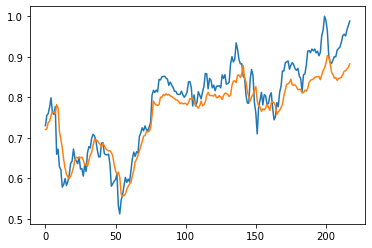

In [13]:
plt.plot(testY)
plt.plot(testPredict)
plt.show()